# Parte 1: Clasificación

# 0. Importar Librerías.

In [86]:
#Librerías de interés.
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 

#from google.colab import files       #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import metrics

from copy import deepcopy                            #Permite hacer copias profundas. 

#!pip install yellowbrick --upgrade                   #Instala y actualiza la librería yellowbrick (la versión por defecto en Google Colab está desactualizada).

from numpy.random import default_rng                 #Generador de números pseudo aleatorios.

%matplotlib inline

# 1. Cargar Datos

In [87]:
# Vamos a leer el conjunto de datos en un dataframe de pandas. 
#df = pd.read_csv('/content/diabetes.csv')
df = pd.read_csv('diabetes.csv', na_values='?')
print (df.shape)

(768, 9)


# 2. Análisis Exploratorio de los Datos (EDA)

Recordemos que el Análisis Exploratorio de los Datos tiene como objetivos principales:

1. Identificar los tipos de datos y problemas en la calidad de los mismos, así como establecer estrategiar para contrarrestar esos problemas: Algunos problemas comunes incluyen:
- Datos faltantes (campos vacíos, nan).
- Datos anómalos (outliers).
- Datos repetidos (atributos repetidos, observaciones repetidas).
- Problemas de escala en los valores (e.g.: unos atributos con valores muy grandes y otros con valores muy pequeños).
- Problemas con los tipos de datos (asignación errónea de enteros, flotantes, cadenas de caracteres, fechas, horas, ubicaciones geográficas, etc..)

2. Estimar si puede servir para responder la pregunta de investigación.

3. Identificar relaciones entre las variables.

4. Identificar patrones y tendencias en los datos.

In [88]:
# Inspeccionemos el dataframe:
print('-----------------------------------------------------------------------')
print('Primeras filas del dataframe:')  
print('-----------------------------------------------------------------------')
print(df.head(),'\n\n')

print('-----------------------------------------------------------------------')
print('Información del dataframe:')  
print('-----------------------------------------------------------------------')
print(df.info(),'\n\n')

print('-----------------------------------------------------------------------')
print('Descripción del dataframe:')  
print('-----------------------------------------------------------------------')
print(df.describe())

-----------------------------------------------------------------------
Primeras filas del dataframe:
-----------------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   


-----------------------------------------------------------------------
Información del dataframe:
---------------------------

#### Uno de los aspectos importantes que se debe revisar cuando se tiene un problema de clasificación es identificar la distribución de las clases o categorías en el dataset

Conteo de objetos por clase:
0    500
1    268
Name: Outcome, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



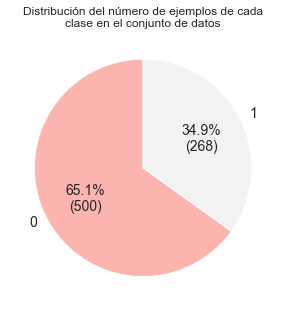

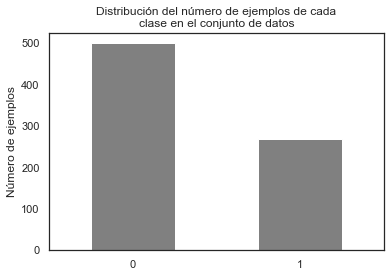

In [89]:
#Econtremos cómo están repartidas las categorías en el conjunto de datos. 
conteo_de_ejemplos_por_clase = df['Outcome'].value_counts()
print('Conteo de objetos por clase:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_clase),'\n')

#Revisemos esta información de forma gráfica.
#-------------------------------------------------------------------------------
#Opción 1: usemos un gráfico tipo pastel desde pandas. 
#-------------------------------------------------------------------------------
conteo_de_ejemplos_por_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('') #Esto es para evitar un texto en el eje y que diría Species.
plt.show()

#-------------------------------------------------------------------------------
#Opción 2: usemos un gráfico de barras. 
#-------------------------------------------------------------------------------
ax = conteo_de_ejemplos_por_clase.plot.bar(x='Outcome', rot=0, color='gray')
plt.title(titulo) 
plt.ylabel('Número de ejemplos')
plt.show()

### Correlaciones de los antes antes de hacer limpieza

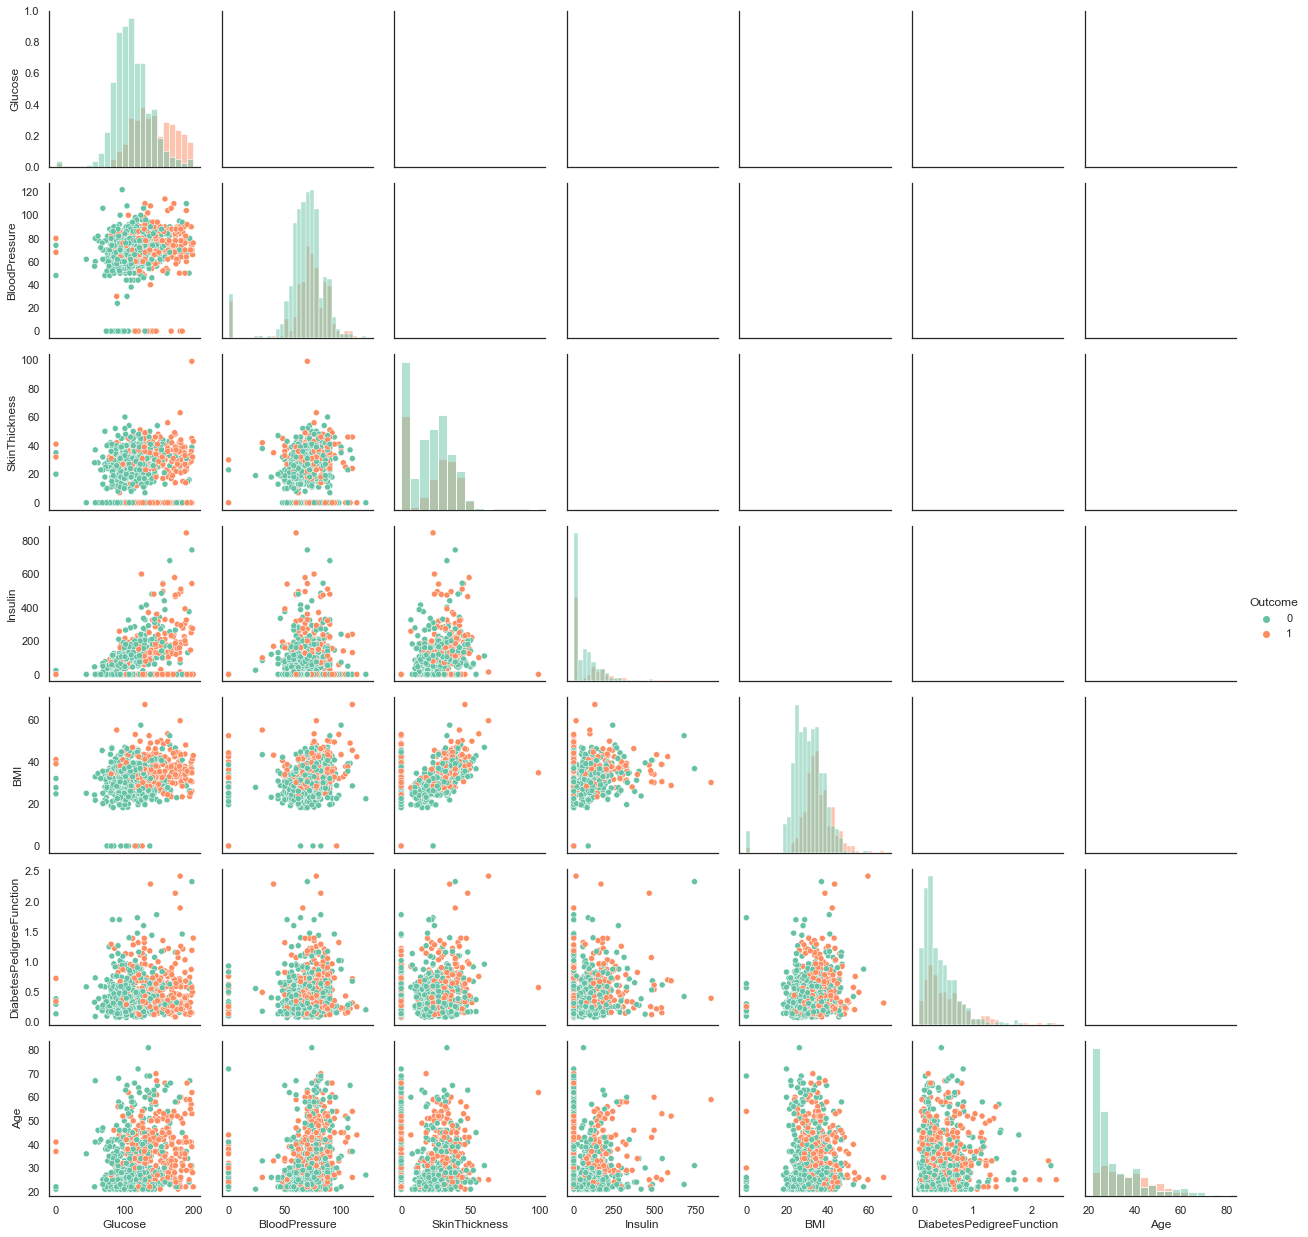

In [90]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df.iloc[:,1:],hue='Outcome',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

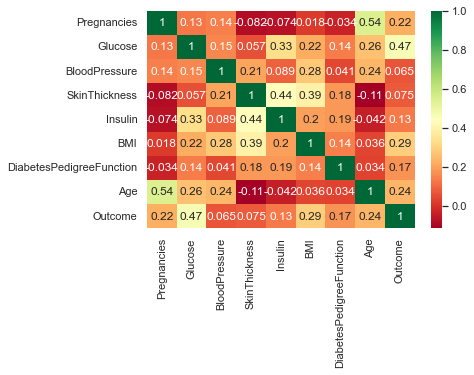

In [91]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [92]:
df_clean = deepcopy(df)

In [93]:
df_clean.shape

(768, 9)

### Pregunta 2.1.

¿Hay datos nulos? En caso afirmativo, ¿qué estrategia implementaría para enfrentar esta situación?

In [94]:
a = df_clean.isnull().values.sum()
print(a)

0


#### Respuesta Pregunta 2.1

No hay datos nulos.

### Pregunta 2.2 

¿Hay observaciones repetidas? En caso afirmativo, ¿qué estrategia implementaría para enfrentar esta situación?

In [95]:
bool_series = df_clean.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [96]:
print(sum(bool_series))

0


#### Respuesta Pregunta 2.2

No hay datos repetidos.

### Pregunta 2.3

¿Hay atributos con valor cero que no corresponde? En caso afirmativo, ¿qué estrategia implementaría para enfrentar esta situación?

#### Respuesta Pregunta 2.3

In [97]:
#Nombre de los posibles atributos de entrada:
# 0   Pregnancies (tiene ceros): es normal que hayan valores cero en este atributo.
# 1   Glucose (tiene ceros) : NO es normal que hayan valores cero en este atributo.
# 2   BloodPressure (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 3   SkinThickness (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 4   Insulin (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 5   BMI (tiene ceros): NO es normal que hayan valores cero en este atributo.
# 6   DiabetesPedigreeFunction (NO tiene ceros)
# 7   Age (NO tiene ceros)

n_rows, n_cols = df_clean.shape

for i in range(n_cols-1):
    atributo_de_interes = df.columns[i]
    count = (df_clean[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    print("\n")

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


Atributo: Glucose
Número de valores 0:  5
Porcentaje de valores cero: 0.65


Atributo: BloodPressure
Número de valores 0:  35
Porcentaje de valores cero: 4.56


Atributo: SkinThickness
Número de valores 0:  227
Porcentaje de valores cero: 29.56


Atributo: Insulin
Número de valores 0:  374
Porcentaje de valores cero: 48.70


Atributo: BMI
Número de valores 0:  11
Porcentaje de valores cero: 1.43


Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00




La estragia que se va a utilizar es reemplazar los valores cero por la mediana. Hay que tener en cuenta que para cada atriburo que se vaya a reemplazar, si el paciente tiene diabetes se debe usar la mediana de los pacientes que tienen diabetes y si no tiene diabetes la mediana de los pacientes que no tienen diabetes.

Por ejemplo, una muestra (observación) tiene cero en el atributo glucosa y el valor de su target indica que tiene diabetes, entonces para este paciente el valor cero debe reemplazarse con la media de la glucosa de los pacientes que tienen diabetes.

In [98]:
sns.set_theme(style="whitegrid")
n_rows, n_cols = df.shape
df_1 = df_clean.loc[df_clean['Outcome'] == 1]
df_0 = df_clean.loc[df_clean['Outcome'] == 0]

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    print("Mediana de atributo " + atributo_de_interes + " para Diabético: %.2f" % np.median(df_1[atributo_de_interes]))
    print("Mediana de atributo " + atributo_de_interes + " para NO Diabético: %.2f" % np.median(df_0[atributo_de_interes]))
    print('\n')

Mediana de atributo Pregnancies para Diabético: 4.00
Mediana de atributo Pregnancies para NO Diabético: 2.00


Mediana de atributo Glucose para Diabético: 140.00
Mediana de atributo Glucose para NO Diabético: 107.00


Mediana de atributo BloodPressure para Diabético: 74.00
Mediana de atributo BloodPressure para NO Diabético: 70.00


Mediana de atributo SkinThickness para Diabético: 27.00
Mediana de atributo SkinThickness para NO Diabético: 21.00


Mediana de atributo Insulin para Diabético: 0.00
Mediana de atributo Insulin para NO Diabético: 39.00


Mediana de atributo BMI para Diabético: 34.25
Mediana de atributo BMI para NO Diabético: 30.05


Mediana de atributo DiabetesPedigreeFunction para Diabético: 0.45
Mediana de atributo DiabetesPedigreeFunction para NO Diabético: 0.34


Mediana de atributo Age para Diabético: 36.00
Mediana de atributo Age para NO Diabético: 27.00




Se van a cambiar los ceros de los siguientes atributos

1. Glucose (tiene ceros) : NO es normal que hayan valores cero en este atributo.
2. BloodPressure (tiene ceros): NO es normal que hayan valores cero en este atributo.
3. SkinThickness (tiene ceros): NO es normal que hayan valores cero en este atributo.
4. Insulin (tiene ceros): NO es normal que hayan valores cero en este atributo.
5. BMI (tiene ceros):NO es normal que hayan valores cero en este atributo.

In [99]:
predictores = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [100]:
df_1 = df_clean.loc[df_clean['Outcome'] == 1]
df_0 = df_clean.loc[df_clean['Outcome'] == 0]

for atributo in predictores:
    df_1 = df_1.replace({atributo:0}, np.median(df_1[atributo]))
    df_0 = df_0.replace({atributo:0}, np.median(df_0[atributo]))

dataframe = [df_1, df_0]
df_clean = pd.concat(dataframe)

In [101]:
n_rows, n_cols = df_clean.shape

for i in range(n_cols-1):
    atributo_de_interes = df_clean.columns[i]
    count = (df_clean[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    print("\n")

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


Atributo: Glucose
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: BloodPressure
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: SkinThickness
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Insulin
Número de valores 0:  138
Porcentaje de valores cero: 17.97


Atributo: BMI
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00




### Pregunta 2.4

¿Hay atributos que tengan outliers? En caso afirmativo, ¿qué estrategia implementa para enfrentar esta situación?

Sugerencia: Desarrolle una función a la que se le pase un dataframe y entregue un reporte por cada atributo del número de outliers y su porcentaje.

#### Respuesta Pregunta 2.4

In [102]:
def dataframeOutliersReport (df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for i in range(df_clean.columns.size-1):
    attribute = df_clean.columns[i]
    column = df_clean[attribute]
    outliers = dataframeOutliersReport(column)
    outliersNumber = len(outliers)
    percentage = outliersNumber/column.count() * 100
    print('Atributo: ' + attribute)
    print('Número de outliers: ' + str(outliersNumber))
    print('Porcentaje de outliers: %.3f' % percentage + '%')
    print('\n')

Atributo: Pregnancies
Número de outliers: 4
Porcentaje de outliers: 0.521%


Atributo: Glucose
Número de outliers: 0
Porcentaje de outliers: 0.000%


Atributo: BloodPressure
Número de outliers: 14
Porcentaje de outliers: 1.823%


Atributo: SkinThickness
Número de outliers: 15
Porcentaje de outliers: 1.953%


Atributo: Insulin
Número de outliers: 54
Porcentaje de outliers: 7.031%


Atributo: BMI
Número de outliers: 8
Porcentaje de outliers: 1.042%


Atributo: DiabetesPedigreeFunction
Número de outliers: 29
Porcentaje de outliers: 3.776%


Atributo: Age
Número de outliers: 9
Porcentaje de outliers: 1.172%




### Correlaciones

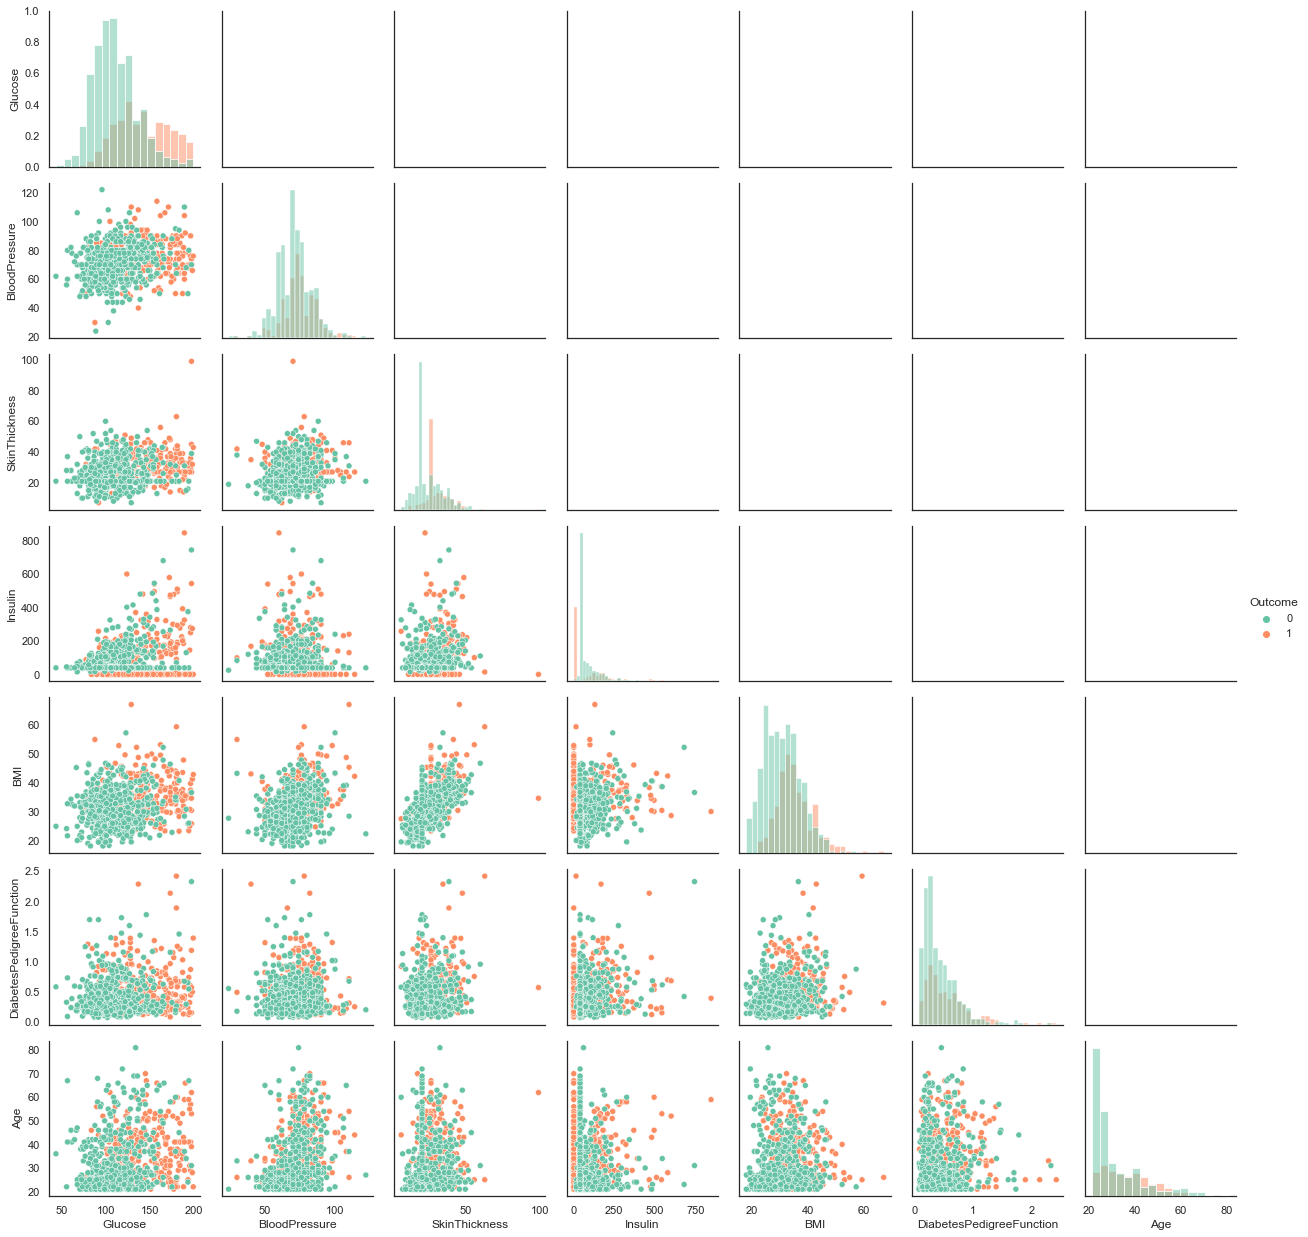

In [103]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean.iloc[:,1:],hue='Outcome',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

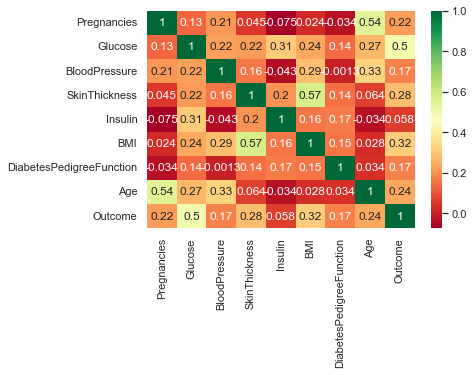

In [104]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

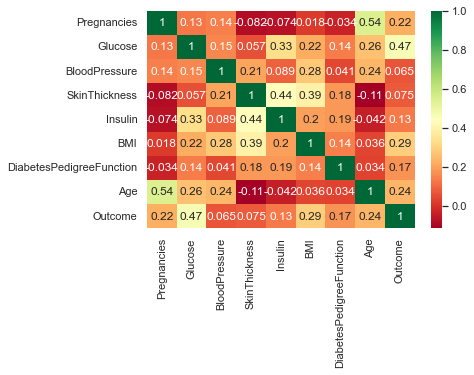

In [105]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

### Pregunta 2.5

a. Oganice de mayor a menor los predictores más correlacionados con la variable target.

b. Identifique si hay atributos que estén muy correlacionados.

c. Señale los cambios más significativos en la matriz de correlación de df_clean con respecto a la obtenida de df y dé su opinión.

#### Respuesta Pregunta 2.5

Correlation with 'outcome' attribute in descendant order
Glucose                     0.495990
BMI                         0.315606
SkinThickness               0.282844
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.173316
Name: Outcome, dtype: float64


Correlation greater than 0.85
Series([], dtype: float64)


Correlation in df_clean
BMI                       SkinThickness    0.573227
SkinThickness             BMI              0.573227
Age                       Pregnancies      0.544341
Pregnancies               Age              0.544341
Glucose                   Outcome          0.495990
                                             ...   
DiabetesPedigreeFunction  Age              0.033561
BMI                       Age              0.027873
Age                       BMI              0.027873
BMI                       Pregnancies      0.023887
Pregnancies               BMI              0.0238

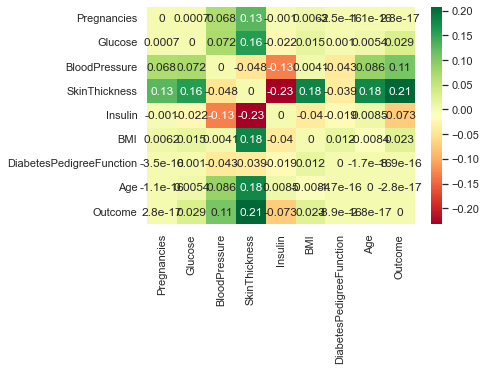

In [106]:
corr_matrix = df_clean.corr()
sorted_corr = np.abs(corr_matrix.Outcome).sort_values(ascending=False)[1:-1]
print("Correlation with 'outcome' attribute in descendant order",sorted_corr,sep="\n")

greatest_corr = corr_matrix.unstack().where(lambda x: (x > 0.85) & (x < 1)).dropna().sort_values(ascending=False)
print("\n")
print("Correlation greater than 0.85",greatest_corr,sep="\n")

# Matriz de correlación de df_clean
df_clean_corr_matrix = df_clean.corr()
df_clean_corr_list = df_clean_corr_matrix.unstack().where(lambda x: (x > 0) & (x < 1)).dropna().sort_values(ascending=False)
print("\n")
print("Correlation in df_clean",df_clean_corr_list,sep="\n")

# Matriz de correlación de df
df_corr_matrix = df.corr()
df_corr_list = df_corr_matrix.unstack().where(lambda x: (x > 0) & (x < 1)).dropna().sort_values(ascending=False)
print("\n")
print("Correlation in df",df_corr_list,sep="\n")

# Matriz de diferencias entre df_clean y df
diff_matrix = df_clean_corr_matrix - df_corr_matrix
diff_list = diff_matrix.unstack().where(lambda x: (x > 0.0) & (x < 1.0)).dropna().sort_values(ascending=False)
print("\n")
print("Difference between df_clean and df",diff_list,sep="\n")
print("\n")
print("Difference between df_clean and df in a graph")
ax = sns.heatmap(diff_matrix,annot=True,cmap='RdYlGn')

# 3. Modelo y 4. Evaluación

### Para este problema de clasificación vamos a usar un modelo KNN. Para construir el modelo debemos seleccionar los predictores (atributos) y el valor de K y para hacerlo vamos a utilizar dos protocolos.

1. Train/Val/Test
2. Cross-Validation]

### Baseline

In [107]:
count_p = (df_clean["Outcome"] == 1).sum()
print("Número de Observaciones para Diabéticos: ", count_p)

count_n = (df_clean["Outcome"] == 0).sum()
print("Número de Observaciones para NO Diabéticos: ", count_n)

print("Línea Base: %.2f" % (100*count_n/(count_p+count_n)))

Número de Observaciones para Diabéticos:  268
Número de Observaciones para NO Diabéticos:  500
Línea Base: 65.10


### 1. Protocolo de evaluación Train/Val/Test

In [108]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='Outcome' 

#Nombre de los posibles atributos de entrada:
# 'Pregnancies'
# 'Glucose'
# 'BloodPressure'
# 'SkinThickness'
# 'Insulin'
# 'BMI'
# 'DiabetesPedigreeFunction'
# 'Age'

nombre_de_las_variables_de_entrada = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

df_y = df[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(df_y)

df_x = deepcopy(df[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(df_x)

Dataframe de salida:
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Dataframe de entrada:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
76

In [109]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo o validación, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 3
4#Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    #Una fracción de los datos de entrada. 
                                                              df_y_rest,                                    #Una fracción de los datos de salida.        
                                                              test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_desarrollo*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

conteo_de_ejemplos_por_clase = df_y_train.value_counts()
print('Conteo de objetos por clase en el conjunto de entrenamiento:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de entrenamiento es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_val.value_counts()
print('Conteo de objetos por clase en el conjunto de validación:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de validación es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_test.value_counts()
print('Conteo de objetos por clase en el conjunto de prueba:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de prueba es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 468 to 341
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train,df_y_train)
    y_predicted_train = knn.predict(df_x_train)    
    y_predicted_val = knn.predict(df_x_val)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.6948


For k= 2 accuracy in training set = 0.8478
For k= 2 accuracy in validation set = 0.7857


For k= 3 accuracy in training set = 0.8478
For k= 3 accuracy in validation set = 0.7273


For k= 4 accuracy in training set = 0.7935
For k= 4 accuracy in validation set = 0.7727


For k= 5 accuracy in training set = 0.7783
For k= 5 accuracy in validation set = 0.7532


For k= 6 accuracy in training set = 0.7891
For k= 6 accuracy in validation set = 0.7727


For k= 7 accuracy in training set = 0.7804
For k= 7 accuracy in validation set = 0.7403


For k= 8 accuracy in training set = 0.7848
For k= 8 accuracy in validation set = 0.7468


For k= 9 accuracy in training set = 0.7957
For k= 9 accuracy in validation set = 0.7597


For k= 10 accuracy in training set = 0.7891
For k= 10 accuracy in validation set = 0.7532


For k= 11 accuracy in training set = 0.7957
For k= 11 accuracy in validation set = 0.7727


For k=

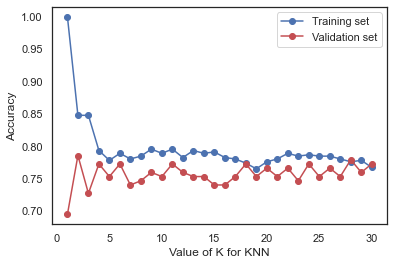

In [111]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Pregunta 3.1

De acuerdo con el resultado obtenido, escoja el mejor valor de k y justifique.

#### Respuesta Pregunta 3.1

Lo más importante de un modelo de machine learning es que pueda hacer predicciones correctas ante observaciones que no son usadas en el entrenamiento (generalización). Desde ese punto de vista, el valor de k con el que se obtiene el mayor accuracy en el validation_set es 2. También se puede notar que el accuracy en el train_set es el segundo más alto, indicando que aprendión bien de los datos de entrenamiento.

In [112]:
max_index_col = np.argmax(k_scores_val, axis=0)

print("El mejor valor de k es: ", max_index_col+1)

El mejor valor de k es:  2


### Pregunta 3.2

Entregue un reporte del desempeño del modelo con el valor de k seleccionado.

In [113]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train,df_y_train)

KNeighborsClassifier(n_neighbors=2)

In [114]:
y_predicted_test = knn.predict(df_x_test)

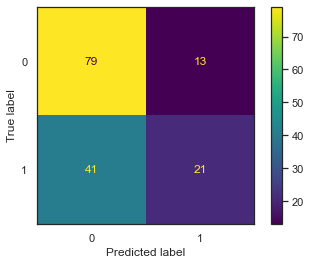

In [115]:
cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

In [116]:
acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.6494


In [117]:
y_predicted_train = knn.predict(df_x_train)
y_predicted_val = knn.predict(df_x_val)
acc_train = metrics.accuracy_score(df_y_train,y_predicted_train)
print('Accuracy on training data: %.4f'% acc_train)
acc_val = metrics.accuracy_score(df_y_val,y_predicted_val)
print('Accuracy on validation data: %.4f'% acc_val)

Accuracy on training data: 0.8478
Accuracy on validation data: 0.7857


### Pregunta 3.3

Pruebe dos valores diferentes de semilla aleatoria, escoja el mejor valor de K para cada caso, entrene el modelo, evalúelo en el conjunto de prueba, consigne y compare los resultados.

#### Respuesta Pregunta 3.3

In [118]:
mezclar_datos = True

semilla_aleatoria_1 = 2

#Porcentajes de división de datos. 
particion_para_training = 0.6  
particion_para_development = 0.2  

particion_para_training_and_development = particion_para_training + particion_para_development
particion_para_tests = 1.0-particion_para_training_and_development

# **SEMILLA 1**

In [119]:
#Semilla 1

df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         
                                                              df_y,                                         
                                                              test_size=particion_para_tests, 
                                                              random_state=semilla_aleatoria_1, 
                                                              shuffle=mezclar_datos)
 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    
                                                              df_y_rest,                                         
                                                              test_size=particion_para_development/particion_para_training_and_development,
                                                              random_state=semilla_aleatoria_1,
                                                              shuffle=False) 
 
print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_training*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_development*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_tests*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

conteo_de_ejemplos_por_clase = df_y_train.value_counts()
print('Conteo de objetos por clase en el conjunto de entrenamiento:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de entrenamiento es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_val.value_counts()
print('Conteo de objetos por clase en el conjunto de validación:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de validación es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_test.value_counts()
print('Conteo de objetos por clase en el conjunto de prueba:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de prueba es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')




-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 602 to 313
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train,df_y_train)
    y_predicted_train = knn.predict(df_x_train)    
    y_predicted_val = knn.predict(df_x_val)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.6623


For k= 2 accuracy in training set = 0.8043
For k= 2 accuracy in validation set = 0.7013


For k= 3 accuracy in training set = 0.7978
For k= 3 accuracy in validation set = 0.6948


For k= 4 accuracy in training set = 0.7957
For k= 4 accuracy in validation set = 0.6818


For k= 5 accuracy in training set = 0.7913
For k= 5 accuracy in validation set = 0.6818


For k= 6 accuracy in training set = 0.7804
For k= 6 accuracy in validation set = 0.6883


For k= 7 accuracy in training set = 0.7935
For k= 7 accuracy in validation set = 0.6883


For k= 8 accuracy in training set = 0.7761
For k= 8 accuracy in validation set = 0.7078


For k= 9 accuracy in training set = 0.7913
For k= 9 accuracy in validation set = 0.7208


For k= 10 accuracy in training set = 0.7783
For k= 10 accuracy in validation set = 0.7403


For k= 11 accuracy in training set = 0.7826
For k= 11 accuracy in validation set = 0.7208


For k=

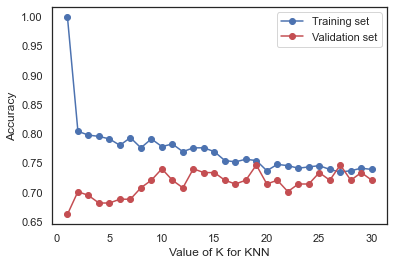

In [121]:
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

El valor de k con el que se obtiene el mayor accuracy en el validation_set es 19 o 27 (tienen el mismo resultado de validación) con un valor de 0.7468, lo que indica que aprendió bien los datos de entrenamiento.

# **Entrenamiento del modelo**

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_x_train_norm = scaler.fit_transform(df_x_train)
df_x_val_norm = scaler.transform(df_x_val)
df_x_test_norm = scaler.transform(df_x_test)

In [123]:
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train_norm,df_y_train)
    y_predicted_train = knn.predict(df_x_train_norm)    
    y_predicted_val = knn.predict(df_x_val_norm)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.7597


For k= 2 accuracy in training set = 0.8217
For k= 2 accuracy in validation set = 0.7208


For k= 3 accuracy in training set = 0.8304
For k= 3 accuracy in validation set = 0.7792


For k= 4 accuracy in training set = 0.7891
For k= 4 accuracy in validation set = 0.7403


For k= 5 accuracy in training set = 0.7913
For k= 5 accuracy in validation set = 0.7792


For k= 6 accuracy in training set = 0.7717
For k= 6 accuracy in validation set = 0.7662


For k= 7 accuracy in training set = 0.7674
For k= 7 accuracy in validation set = 0.7857


For k= 8 accuracy in training set = 0.7565
For k= 8 accuracy in validation set = 0.7597


For k= 9 accuracy in training set = 0.7630
For k= 9 accuracy in validation set = 0.7597


For k= 10 accuracy in training set = 0.7478
For k= 10 accuracy in validation set = 0.7792


For k= 11 accuracy in training set = 0.7543
For k= 11 accuracy in validation set = 0.7792


For k=

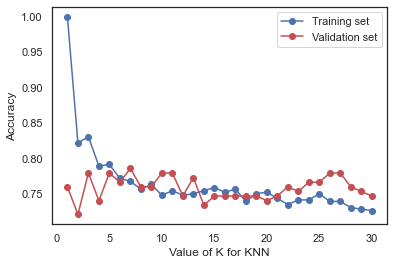

In [124]:
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy on test data: 0.6169


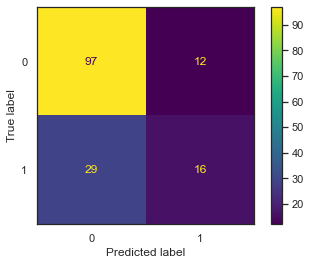

Accuracy on test data: 0.7338


In [125]:
# MODELO CON DATOS NORMALIZADOS

acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

k = 12
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train_norm,df_y_train)


y_predicted_test = knn.predict(df_x_test_norm)

cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

# **SEMILLA 2**

In [126]:
mezclar_datos = True

semilla_aleatoria_2 = 6

#Porcentajes de división de datos. 
particion_para_training = 0.6  
particion_para_development = 0.2  

particion_para_training_and_development = particion_para_training + particion_para_development
particion_para_tests = 1.0-particion_para_training_and_development

In [127]:
#Semilla 2

df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         
                                                              df_y,                                         
                                                              test_size=particion_para_tests, 
                                                              random_state=semilla_aleatoria_2, 
                                                              shuffle=mezclar_datos)
 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    
                                                              df_y_rest,                                         
                                                              test_size=particion_para_development/particion_para_training_and_development,
                                                              random_state=semilla_aleatoria_2,
                                                              shuffle=False) 
 
print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_training*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_development*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_tests*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

conteo_de_ejemplos_por_clase = df_y_train.value_counts()
print('Conteo de objetos por clase en el conjunto de entrenamiento:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de entrenamiento es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_val.value_counts()
print('Conteo de objetos por clase en el conjunto de validación:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de validación es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_test.value_counts()
print('Conteo de objetos por clase en el conjunto de prueba:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de prueba es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')



-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 203 to 18
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo 

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train,df_y_train)
    y_predicted_train = knn.predict(df_x_train)    
    y_predicted_val = knn.predict(df_x_val)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.6818


For k= 2 accuracy in training set = 0.8130
For k= 2 accuracy in validation set = 0.7078


For k= 3 accuracy in training set = 0.8239
For k= 3 accuracy in validation set = 0.6688


For k= 4 accuracy in training set = 0.8043
For k= 4 accuracy in validation set = 0.7078


For k= 5 accuracy in training set = 0.7848
For k= 5 accuracy in validation set = 0.7013


For k= 6 accuracy in training set = 0.7804
For k= 6 accuracy in validation set = 0.7403


For k= 7 accuracy in training set = 0.7891
For k= 7 accuracy in validation set = 0.7468


For k= 8 accuracy in training set = 0.7761
For k= 8 accuracy in validation set = 0.7532


For k= 9 accuracy in training set = 0.7783
For k= 9 accuracy in validation set = 0.7727


For k= 10 accuracy in training set = 0.7674
For k= 10 accuracy in validation set = 0.7792


For k= 11 accuracy in training set = 0.7870
For k= 11 accuracy in validation set = 0.7792


For k=

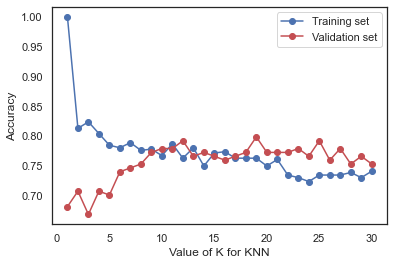

In [129]:
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
max_index_s1 = np.argmax(k_scores_val, axis=0)

print("El mejor valor de k es: ", max_index_s1+1)

El mejor valor de k es:  19


# **Entrenamiento del modelo**

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_x_train_norm = scaler.fit_transform(df_x_train)
df_x_val_norm = scaler.transform(df_x_val)
df_x_test_norm = scaler.transform(df_x_test)

In [132]:
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train_norm,df_y_train)
    y_predicted_train = knn.predict(df_x_train_norm)    
    y_predicted_val = knn.predict(df_x_val_norm)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.7338


For k= 2 accuracy in training set = 0.8239
For k= 2 accuracy in validation set = 0.7208


For k= 3 accuracy in training set = 0.8283
For k= 3 accuracy in validation set = 0.7597


For k= 4 accuracy in training set = 0.7978
For k= 4 accuracy in validation set = 0.7208


For k= 5 accuracy in training set = 0.8022
For k= 5 accuracy in validation set = 0.7338


For k= 6 accuracy in training set = 0.7978
For k= 6 accuracy in validation set = 0.7013


For k= 7 accuracy in training set = 0.7739
For k= 7 accuracy in validation set = 0.7078


For k= 8 accuracy in training set = 0.7913
For k= 8 accuracy in validation set = 0.7013


For k= 9 accuracy in training set = 0.7935
For k= 9 accuracy in validation set = 0.7143


For k= 10 accuracy in training set = 0.7826
For k= 10 accuracy in validation set = 0.7013


For k= 11 accuracy in training set = 0.7783
For k= 11 accuracy in validation set = 0.7078


For k=

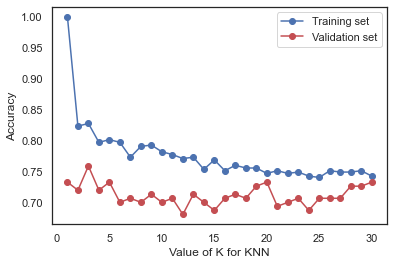

In [133]:
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy on test data: 0.6169


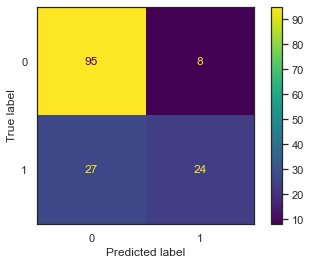

Accuracy on test data: 0.7727


In [134]:
# MODELO CON DATOS NORMALIZADOS

acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

k = 12
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train_norm,df_y_train)


y_predicted_test = knn.predict(df_x_test_norm)

cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

# **Comparación de resultados**

Al utilizar 2 diferentes semillas con valores de 2 y 6, se obtuvieron diferentes resultados, sin embargo, se encontró que K fue un resultado en común, es decir, el mejor valor para K fue 19 en ambos casos.

Comparativamente, para el primer modelo (semilla = 2), el set de validación logra sobre pasar el set de entrenamiento aproximadamente cuando K = 27 y para el segundo modelo (semilla = 6), el set de validación logra sobre pasar el set de entrenamiento cuando K = 12, K = 18, K = 19, K = 20, y asi sucesivamente.

Despues de entrenar ambos modelos con datos normalizados, el modelo 1 cuenta con una precisión en sus datos de entrenamiento de 0.7338 mientras que en el modelo 2 cuenta con una precisión de 0.7727.

Por lo que se puede decir que el mejor modelo es el 2 debido a que tiene una mayor de precisión, indicando que el modelo interpreta de manera efectiva los datos de entrenamiento.

### Pregunta 3.4

Normalice los predictores y pruebe nuevamente el comportamiento del mismo modelo.

#### Respuesta Pregunta 3.4

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_x_train_norm = scaler.fit_transform(df_x_train)
df_x_val_norm = scaler.transform(df_x_val)
df_x_test_norm = scaler.transform(df_x_test)

In [136]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores_train = []
k_scores_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train_norm,df_y_train)
    y_predicted_train = knn.predict(df_x_train_norm)    
    y_predicted_val = knn.predict(df_x_val_norm)
    print('For k= ' + str(k) + ' accuracy in training set = {:.4f}'.format(metrics.accuracy_score(df_y_train,y_predicted_train)))
    print('For k= ' + str(k) + ' accuracy in validation set = {:.4f}'.format(metrics.accuracy_score(df_y_val,y_predicted_val)))
    print('\n')
    k_scores_train.append(metrics.accuracy_score(df_y_train,y_predicted_train))
    k_scores_val.append(metrics.accuracy_score(df_y_val,y_predicted_val))

For k= 1 accuracy in training set = 1.0000
For k= 1 accuracy in validation set = 0.7338


For k= 2 accuracy in training set = 0.8239
For k= 2 accuracy in validation set = 0.7208


For k= 3 accuracy in training set = 0.8283
For k= 3 accuracy in validation set = 0.7597


For k= 4 accuracy in training set = 0.7978
For k= 4 accuracy in validation set = 0.7208


For k= 5 accuracy in training set = 0.8022
For k= 5 accuracy in validation set = 0.7338


For k= 6 accuracy in training set = 0.7978
For k= 6 accuracy in validation set = 0.7013


For k= 7 accuracy in training set = 0.7739
For k= 7 accuracy in validation set = 0.7078


For k= 8 accuracy in training set = 0.7913
For k= 8 accuracy in validation set = 0.7013


For k= 9 accuracy in training set = 0.7935
For k= 9 accuracy in validation set = 0.7143


For k= 10 accuracy in training set = 0.7826
For k= 10 accuracy in validation set = 0.7013


For k= 11 accuracy in training set = 0.7783
For k= 11 accuracy in validation set = 0.7078


For k=

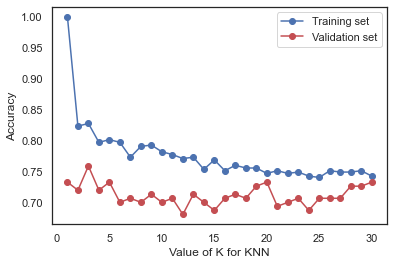

In [137]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_scores_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train_norm,df_y_train)

KNeighborsClassifier(n_neighbors=2)

In [139]:
y_predicted_test = knn.predict(df_x_test_norm)

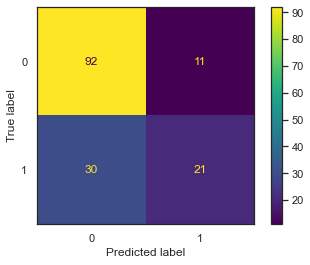

In [140]:
cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

In [141]:
acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.7338


### 2. Protocolo de evaluación Cross-Validation

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
k_scores_std = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_x_rest, df_y_rest, cv=10, scoring='accuracy')
    print('For k= ' + str(k) + ' accuracy = {:.4f} and std = {:.4f}'.format(scores.mean(),scores.std()))
    k_scores.append(scores.mean())
    k_scores_std.append(scores.std())

For k= 1 accuracy = 0.6531 and std = 0.0490
For k= 2 accuracy = 0.7084 and std = 0.0461
For k= 3 accuracy = 0.6888 and std = 0.0442
For k= 4 accuracy = 0.7134 and std = 0.0301
For k= 5 accuracy = 0.7103 and std = 0.0579
For k= 6 accuracy = 0.7264 and std = 0.0398
For k= 7 accuracy = 0.7216 and std = 0.0464
For k= 8 accuracy = 0.7215 and std = 0.0377
For k= 9 accuracy = 0.7347 and std = 0.0460
For k= 10 accuracy = 0.7412 and std = 0.0451
For k= 11 accuracy = 0.7396 and std = 0.0431
For k= 12 accuracy = 0.7526 and std = 0.0423
For k= 13 accuracy = 0.7331 and std = 0.0389
For k= 14 accuracy = 0.7411 and std = 0.0353
For k= 15 accuracy = 0.7461 and std = 0.0381
For k= 16 accuracy = 0.7363 and std = 0.0364
For k= 17 accuracy = 0.7331 and std = 0.0322
For k= 18 accuracy = 0.7396 and std = 0.0396
For k= 19 accuracy = 0.7476 and std = 0.0331
For k= 20 accuracy = 0.7460 and std = 0.0364
For k= 21 accuracy = 0.7361 and std = 0.0379
For k= 22 accuracy = 0.7313 and std = 0.0498
For k= 23 accuracy 

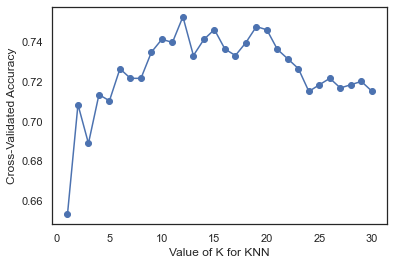

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, marker = 'o',color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.show()


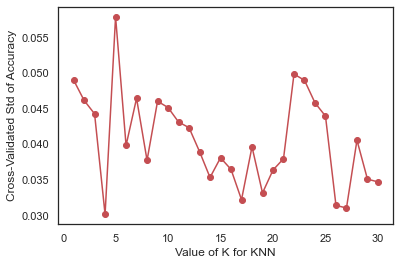

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_std, marker = 'o',color='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Std of Accuracy')

plt.show()


### En este caso el mejor valor de k es: 12

### Pregunta 3.5

¿Por qué se considera que el valor de k=12 es el mejor valor para la combinación de atributos utilizada?

#### Respuesta Pregunta 3.5

12 es el mejor valor para K debido a que contempla una precision alta cuando su desviacion estandar es baja. Aunque si bien su desviacion no es la mas baja ni su precision es la mas alta, su precision implica una menor complejidad de procesamiento que, por ejemplo, K = 28 porque se encuentra mucho despues y el proceso seria de mayor complejidad.

### Se entrena y se prueba el modelo con el k seleccionado

In [145]:
k = 12
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train,df_y_train)

KNeighborsClassifier(n_neighbors=12)

In [146]:
y_predicted_test = knn.predict(df_x_test)

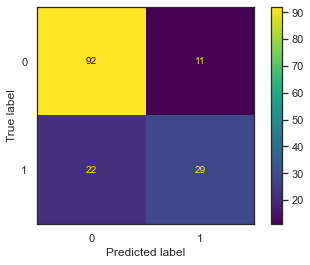

In [147]:
cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

In [148]:
acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.7857


### Ahora se va a entrenar un modelo con el mismo k pero con los datos normalizados.

In [149]:
k = 12
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(df_x_train_norm,df_y_train)

KNeighborsClassifier(n_neighbors=12)

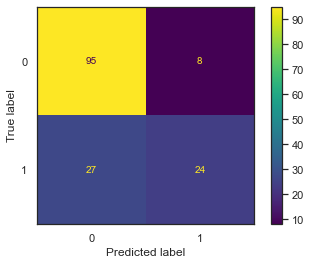

Accuracy on test data: 0.7727


In [150]:
y_predicted_test = knn.predict(df_x_test_norm)

cm_knn = metrics.confusion_matrix(df_y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

acc_test = metrics.accuracy_score(df_y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

# **EJERCICIOS PROPUESTOS TALLER 5.**

## **Ejercicio 1.**

Entrene diferentes modelos usando varias combinaciones de predictores. La idea es superar el resultado obtenido con el modelo que empleaba todos los predictores normalizados y además usar la menor cantidad de predictores posible.

Use los dos protocolos de evaluación (train/val/test y cross-validation) para determinar la mejor combinación de atributos y el mejor valor de k para cada caso.

identifique en cuales de los modelos evaluados se presenta sub entrenamiento (error de sesgo) y sobre entrenamiento (error de varianza).

Consigne todo el procedimiento llevado a cabo para construir el modelo final.

Tenga en cuenta que puede normalizar los atributos, procesar outliers, etc.

Los resultados serán socializados y se determinará cuál es el grupo ganador.

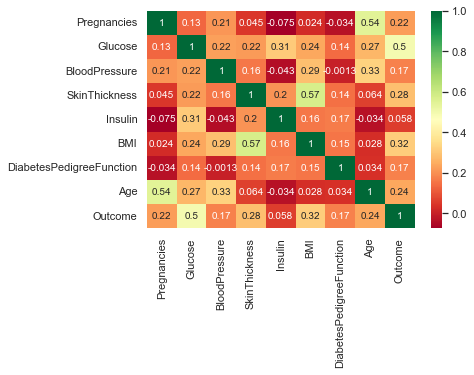

In [151]:
corr_matrix = df_clean.corr()
ax = sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [152]:
sorted_corr = np.abs(corr_matrix.Outcome).sort_values(ascending=False)[1:-1]
print("Correlation with 'outcome' attribute in descendant order",sorted_corr,sep="\n")

greatest_corr = corr_matrix.unstack().where(lambda x: (x > 0.5) & (x < 1)).dropna().sort_values(ascending=False)
print("\n")
print("Correlation greater than 0.5",greatest_corr,sep="\n")

Correlation with 'outcome' attribute in descendant order
Glucose                     0.495990
BMI                         0.315606
SkinThickness               0.282844
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.173316
Name: Outcome, dtype: float64


Correlation greater than 0.5
SkinThickness  BMI              0.573227
BMI            SkinThickness    0.573227
Pregnancies    Age              0.544341
Age            Pregnancies      0.544341
dtype: float64


In [153]:
count_p = (df_clean["Outcome"] == 1).sum()
print("Número de Observaciones para Diabéticos: ", count_p)

count_n = (df_clean["Outcome"] == 0).sum()
print("Número de Observaciones para NO Diabéticos: ", count_n)

print("Línea Base: %.2f" % (100*count_n/(count_p+count_n)))

Número de Observaciones para Diabéticos:  268
Número de Observaciones para NO Diabéticos:  500
Línea Base: 65.10


#### Combinación 1

In [154]:
#Nombre de la salida deseada:

variable_salida='Outcome' 

# Nombre de los posibles atributos de 
# entrada dada su correlación entre si:

# 'Pregnancies'
# 'SkinThickness'
# 'BMI'
# 'Age'

variables_entrada = ['Pregnancies','SkinThickness','BMI','Age']

df_y = df[variable_salida]
print('Dataframe de salida:')
print(df_y)

df_x = deepcopy(df[variables_entrada])
print('\nDataframe de entrada:')
print(df_x)

Dataframe de salida:
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Dataframe de entrada:
     Pregnancies  SkinThickness   BMI  Age
0              6             35  33.6   50
1              1             29  26.6   31
2              8              0  23.3   32
3              1             23  28.1   21
4              0             35  43.1   33
..           ...            ...   ...  ...
763           10             48  32.9   63
764            2             27  36.8   27
765            5             23  26.2   30
766            1              0  30.1   47
767            1             31  30.4   23

[768 rows x 4 columns]


### 1. Protocolo de evaluación Train/Val/Test

In [155]:
mix = True
seed = 27

train = 0.6
dev = 0.2

train_dev = train + dev
test = 1 - train_dev

x_rest, x_test, y_rest, y_test = train_test_split(df_x, df_y, test_size=test, random_state=seed, shuffle=mix)
x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size=dev/train_dev, random_state=seed, shuffle= not mix)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [156]:
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_train = []
k_val = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predicted_train = knn.predict(x_train)    
    y_predicted_val = knn.predict(x_val)
    metrics.ConfusionMatrixDisplay
    k_train.append(metrics.accuracy_score(y_train,y_predicted_train))
    k_val.append(metrics.accuracy_score(y_val,y_predicted_val))

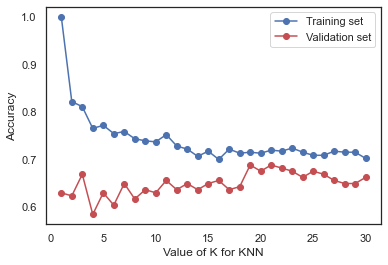

In [157]:
plt.plot(k_range, k_train, marker = 'o', color='b', label="Training set")
plt.plot(k_range, k_val, marker = 'o',color='r',label="Validation set")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [158]:
best_k = np.argmax(k_val, axis=0)
print("El mejor valor de k es: ", best_k+1)

El mejor valor de k es:  19


In [159]:
k = 26
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=26)

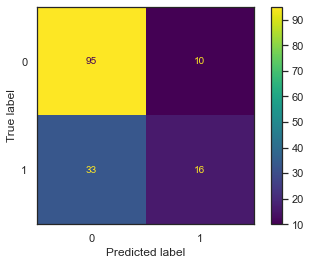

In [160]:
y_predicted_test = knn.predict(x_test)

cm_knn = metrics.confusion_matrix(y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

In [161]:
acc_test = metrics.accuracy_score(y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.7208


In [162]:
y_predicted_train = knn.predict(x_train)
y_predicted_val = knn.predict(x_val)
acc_train = metrics.accuracy_score(y_train,y_predicted_train)
print('Accuracy on training data: %.4f'% acc_train)
acc_val = metrics.accuracy_score(y_val,y_predicted_val)
print('Accuracy on validation data: %.4f'% acc_val)

Accuracy on training data: 0.7087
Accuracy on validation data: 0.6688


#### Conclusiones
Dada la precisión del modelo en el conjunto de entrenamiento y validación, podemos concluir que el modelo no presenta subentrenamiento ni sobreentrenamiento.

### 2. Protocolo de evaluación Cross-Validation

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
k_scores_std = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_rest, y_rest, cv=10, scoring='accuracy')
    print('For k= ' + str(k) + ' accuracy = {:.4f} and std = {:.4f}'.format(scores.mean(),scores.std()))
    k_scores.append(scores.mean())
    k_scores_std.append(scores.std())

For k= 1 accuracy = 0.6301 and std = 0.0563
For k= 2 accuracy = 0.6579 and std = 0.0351
For k= 3 accuracy = 0.6695 and std = 0.0405
For k= 4 accuracy = 0.6483 and std = 0.0442
For k= 5 accuracy = 0.6661 and std = 0.0459
For k= 6 accuracy = 0.6546 and std = 0.0469
For k= 7 accuracy = 0.6709 and std = 0.0443
For k= 8 accuracy = 0.6676 and std = 0.0548
For k= 9 accuracy = 0.6432 and std = 0.0620
For k= 10 accuracy = 0.6482 and std = 0.0459
For k= 11 accuracy = 0.6644 and std = 0.0415
For k= 12 accuracy = 0.6693 and std = 0.0287
For k= 13 accuracy = 0.6562 and std = 0.0365
For k= 14 accuracy = 0.6627 and std = 0.0308
For k= 15 accuracy = 0.6676 and std = 0.0409
For k= 16 accuracy = 0.6660 and std = 0.0390
For k= 17 accuracy = 0.6676 and std = 0.0395
For k= 18 accuracy = 0.6709 and std = 0.0413
For k= 19 accuracy = 0.6643 and std = 0.0342
For k= 20 accuracy = 0.6546 and std = 0.0329
For k= 21 accuracy = 0.6676 and std = 0.0315
For k= 22 accuracy = 0.6628 and std = 0.0364
For k= 23 accuracy 

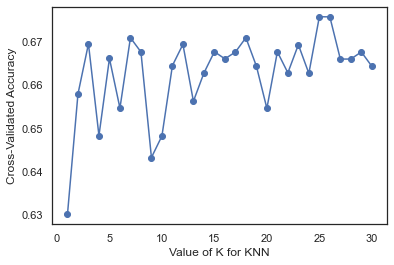

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, marker = 'o',color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.show()

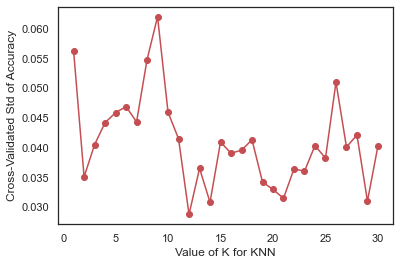

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_std, marker = 'o',color='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Std of Accuracy')

plt.show()

In [166]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

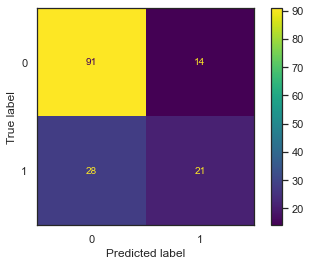

In [167]:
y_predicted_test = knn.predict(x_test)

cm_knn = metrics.confusion_matrix(y_test,y_predicted_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

In [168]:
acc_test = metrics.accuracy_score(y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.7273


In [169]:
acc_test = metrics.accuracy_score(y_test,y_predicted_test)
print('Accuracy on test data: %.4f'% acc_test)

Accuracy on test data: 0.7273


# **Metodología**

1. Desarrolle de forma individual las preguntas propuestas en el Taller 5.

2. Después de la sesión de Taller 5, suba a Intu el archivo con la solución a las preguntas con nombre en el siguiente formato:

Taller_5_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 05 de octubre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_5_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 05 de octubre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 5 se asignará así:

- Preguntas Taller 5 (20%)

- Ejercicios Taller 5 (80%)

### Fin.